# Alucar - Analisando as vendas

In [178]:
import pandas as pd

In [179]:
alucar = pd.read_csv('Dados/alucar.csv')

In [180]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [181]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [182]:
print(f'Quantidade de dados NULOS: {alucar.isna().sum().sum()}')

Quantidade de dados NULOS: 0


In [183]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [184]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [185]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [186]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

In [187]:
print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='mes', ylabel='vendas'>

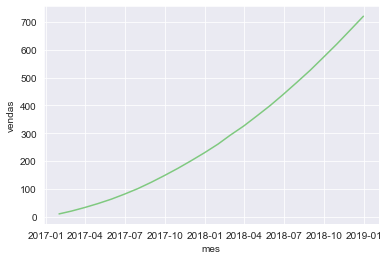

In [188]:
sns.lineplot(x='mes', y='vendas', data=alucar)

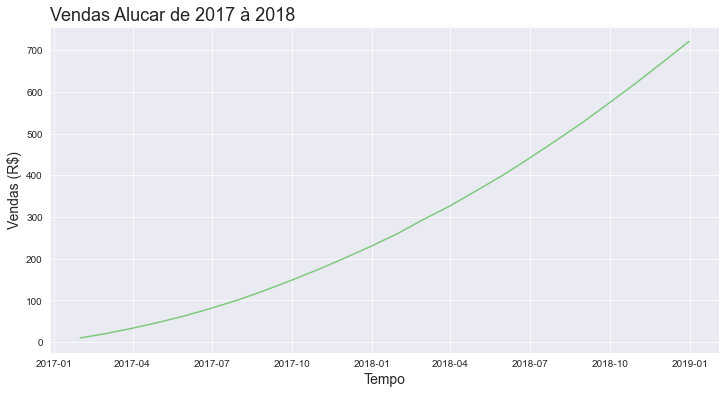

In [189]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)

ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 à 2018', loc='left', fontsize= 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [190]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [191]:
alucar["aumento"] = alucar["vendas"].diff() #pega o mes 02 e subtrai o mes 01 e assim por diante.

In [192]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


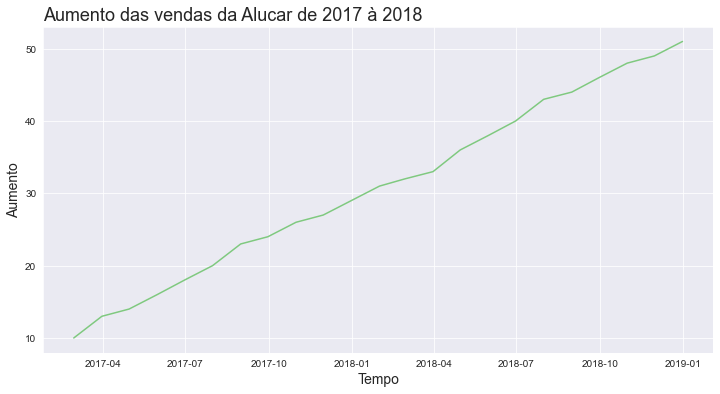

In [193]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)

ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 à 2018', loc='left', fontsize= 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [194]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize= 18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

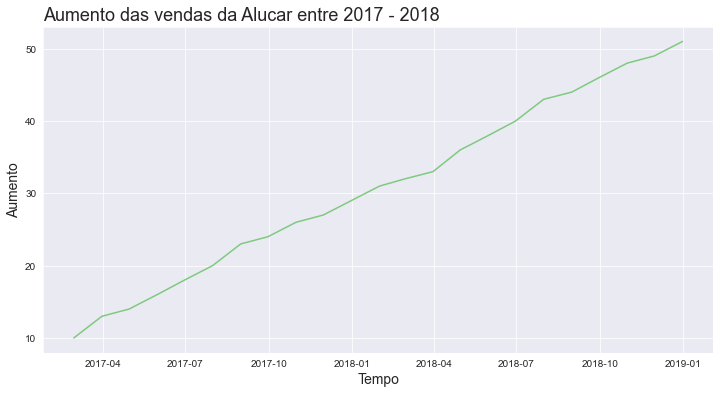

In [195]:
plotar("Aumento das vendas da Alucar entre 2017 - 2018", "Tempo", "Aumento", "mes", "aumento", alucar)

In [196]:
#Descobrindo a aceleração do aumento das vendas


In [197]:
alucar["aceleracao"] = alucar["aumento"].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


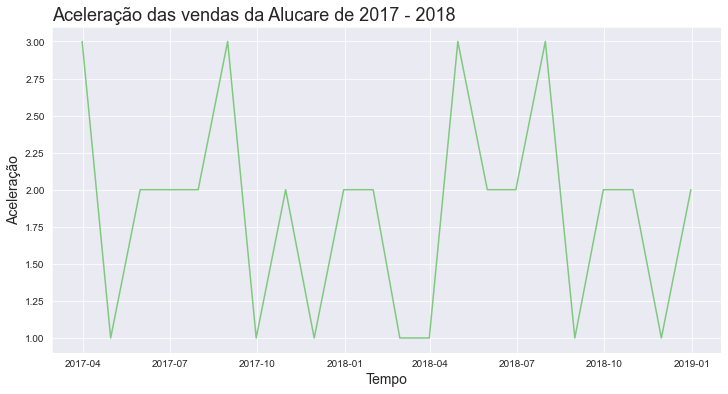

In [198]:
plotar("Aceleração das vendas da Alucare de 2017 - 2018", "Tempo", "Aceleração", "mes", "aceleracao", alucar)


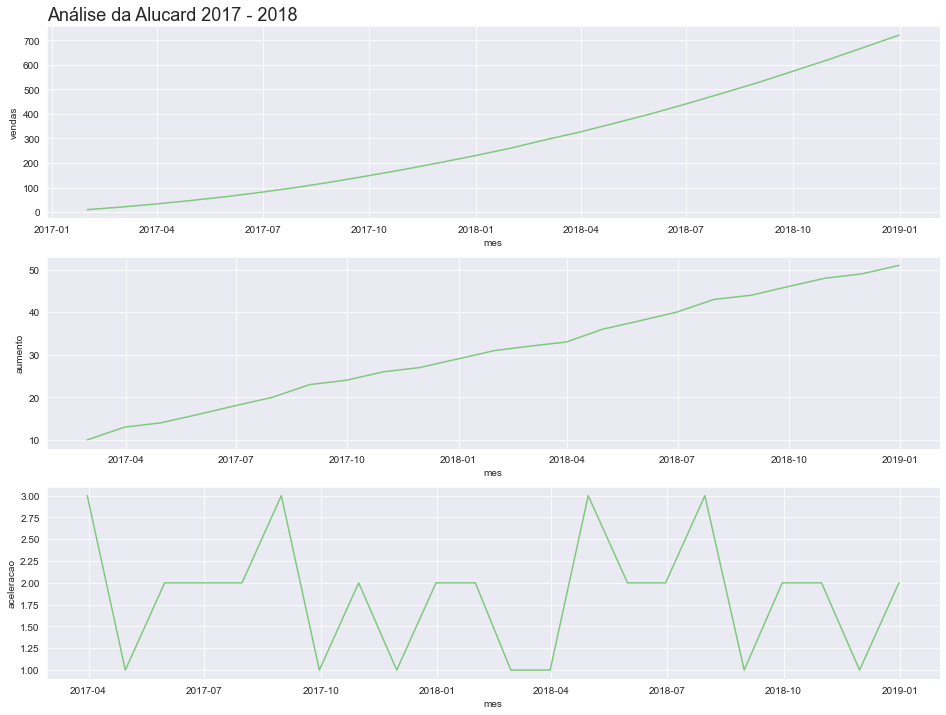

In [199]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title("Análise da Alucard 2017 - 2018", fontsize=18, loc="left")
sns.lineplot(x="mes", y="vendas", data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x="mes", y="aumento", data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x="mes", y="aceleracao", data=alucar)
ax = ax

In [200]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

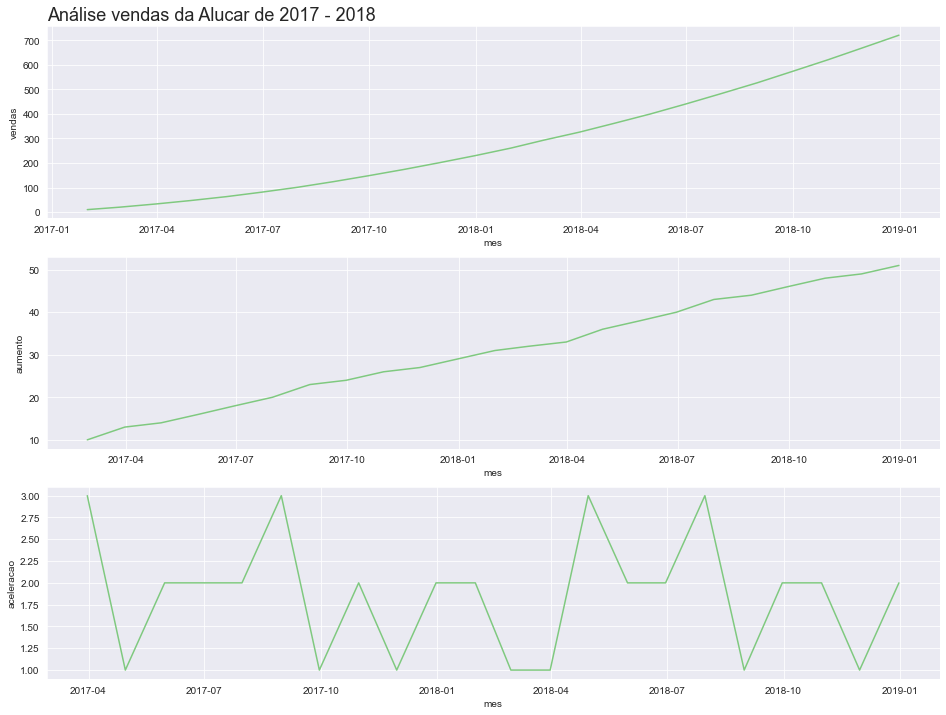

In [201]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", alucar, "Análise vendas da Alucar de 2017 - 2018")

# Utilizando aucorrelação 

In [202]:
#Autocorrelação	Interpretação
#1	correlação perfeita positiva
#0,7 a 0,9	correlação forte
#0,4 a 0,7	correlação moderada
#0,2 a 0,4	correlação fraca
#0	correlação nula
#< 0	correlação negativa
#-1	correlação perfeita negativa

In [203]:
from pandas.plotting import autocorrelation_plot

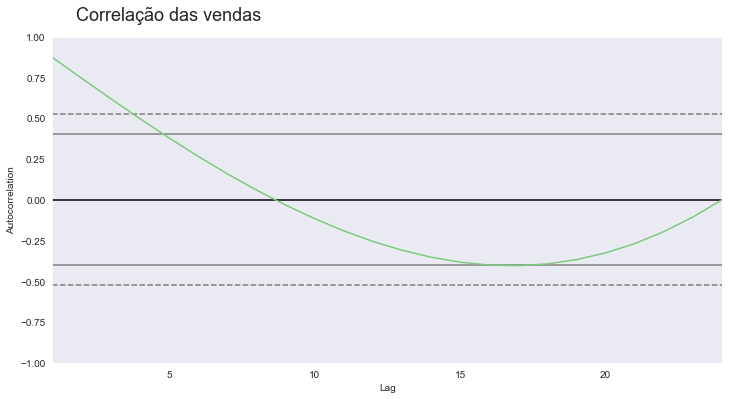

In [204]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das vendas", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["vendas"])
ax = ax

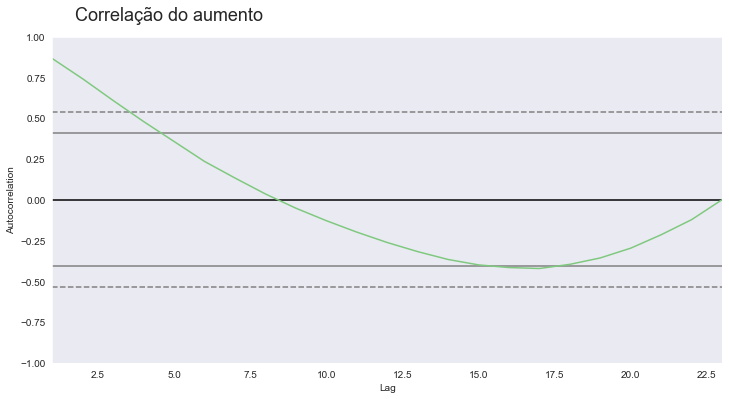

In [205]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação do aumento", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["aumento"][1:])
ax = ax

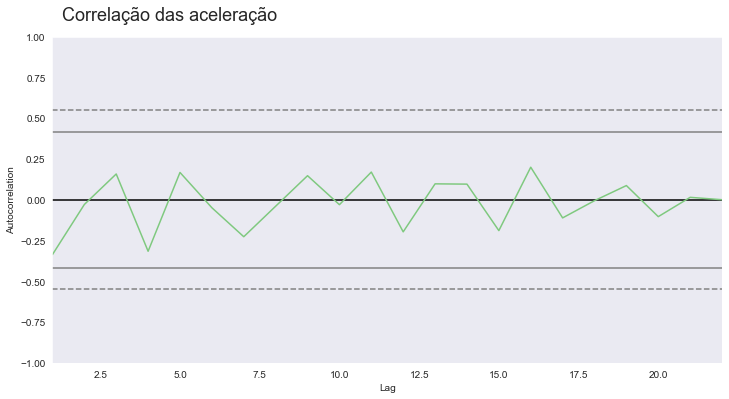

In [206]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das aceleração", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["aceleracao"][2:])
ax = ax

Análise de Assinantes da Newsletter.

In [207]:
assinantes = pd.read_csv('Dados/newsletter_alucar.csv')

In [208]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [209]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [210]:
print(f"Quantidade de linhas e colunas {assinantes.shape}")
print(f"Quantidade de dados nulos {assinantes.isna().sum().sum()}")

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [211]:
assinantes["mes"] = pd.to_datetime(assinantes["mes"])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [212]:
#Verificando o aumento de assinantes

assinantes["aumento"] = assinantes["assinantes"].diff()
assinantes["aceleracao"] = assinantes["aumento"].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


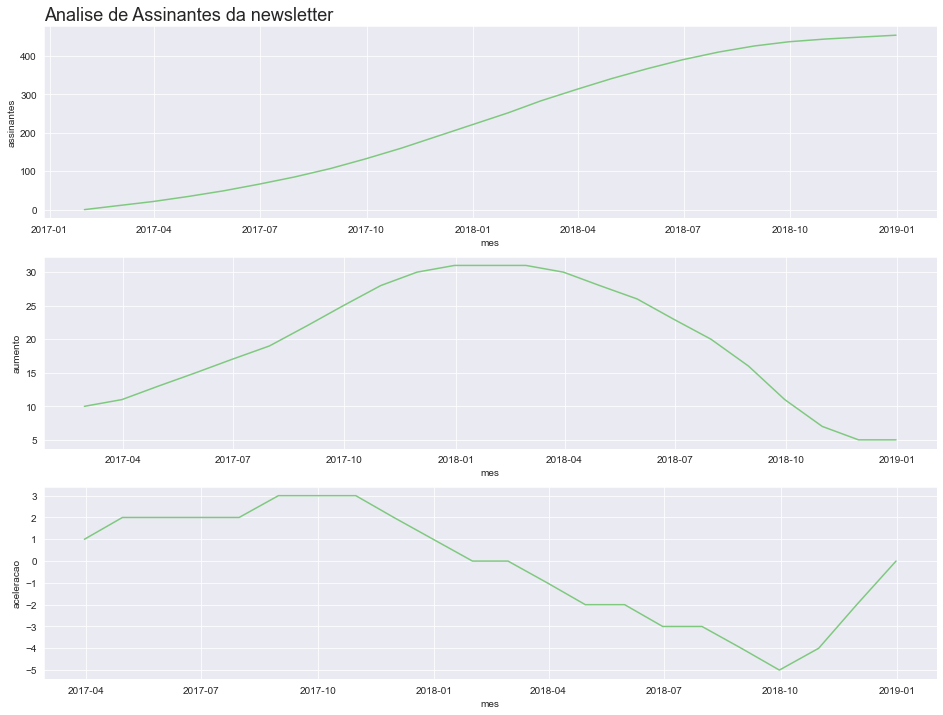

In [213]:
plot_comparacao("mes", "assinantes", "aumento", "aceleracao", assinantes, "Analise de Assinantes da newsletter")

Análise de dados Chocolura

In [214]:
chocolura = pd.read_csv("Dados/chocolura.csv")

In [215]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [216]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [217]:
chocolura["mes"] = pd.to_datetime(chocolura["mes"])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [218]:
print(f"Quantidade de dados nulos: {chocolura.isna().sum().sum()}")
print(f"Quantidade de linhas: {chocolura.shape}")

Quantidade de dados nulos: 0
Quantidade de linhas: (24, 2)


In [219]:
chocolura["aumento"] = chocolura["vendas"].diff()
chocolura["aceleracao"] = chocolura["aumento"].diff()

chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


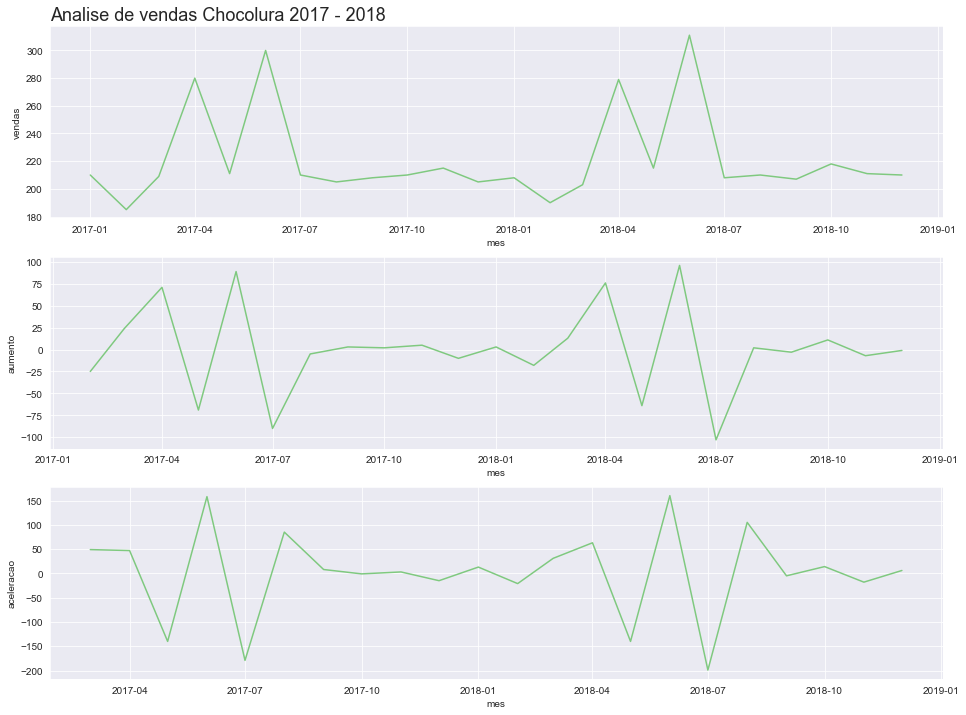

In [220]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", chocolura, "Analise de vendas Chocolura 2017 - 2018")

Investigando Sazonalidade


In [221]:
#Vendas diárias Outubroe Novembro

In [222]:
vendas_por_dia = pd.read_csv("Dados/vendas_por_dia.csv")
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [223]:
print(f"Quantidade de linhas e colunas: {vendas_por_dia.shape}")
print(f"Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [224]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [225]:
vendas_por_dia["dia"] = pd.to_datetime(vendas_por_dia["dia"])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [226]:
vendas_por_dia["aumento"] = vendas_por_dia["vendas"].diff()
vendas_por_dia["aceleracao"] = vendas_por_dia["aumento"].diff()
vendas_por_dia.head()


,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


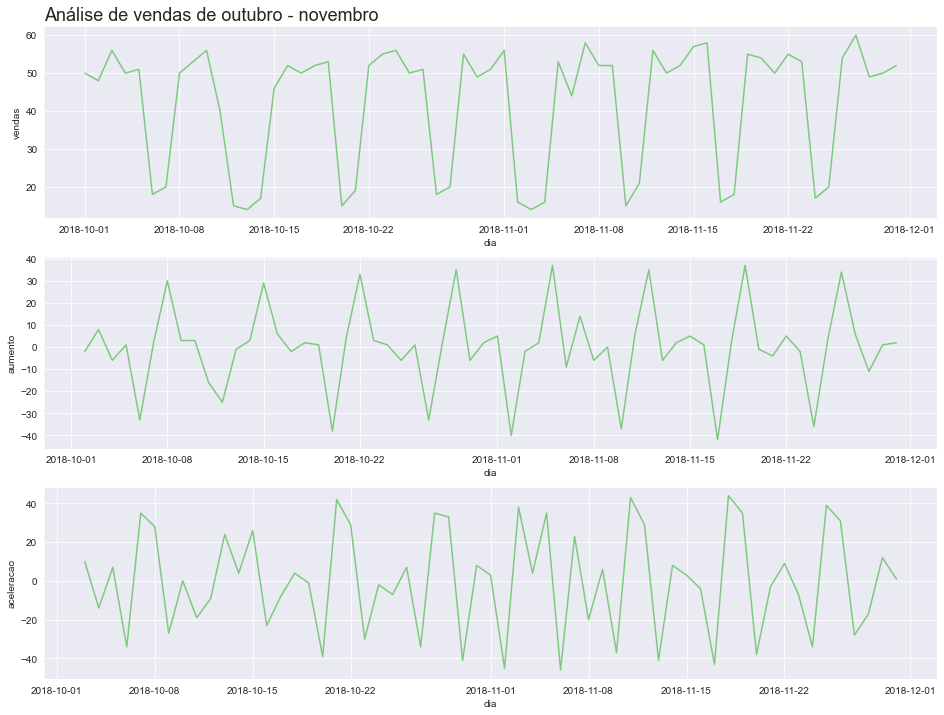

In [227]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", vendas_por_dia, "Análise de vendas de outubro - novembro")

Análisando Sazonalidade

In [228]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [229]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [230]:
vendas_por_dia["dia_da_semana"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [231]:
dias_traduzidos = {
    "Monday": "Segunda",
    "Tuesday": "Terça",
    "Wednesday": "Quarta",
    "Thursday": "Quinta",
    "Friday": "Sexta",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

In [232]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia["dia_da_semana"].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Agrupando os Dias**

In [233]:
vendas_agrupadas = vendas_por_dia.groupby("dia_da_semana")["vendas", "aumento", "aceleracao"].mean().round()
vendas_agrupadas.head(7)

C:\Users\Gustavo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


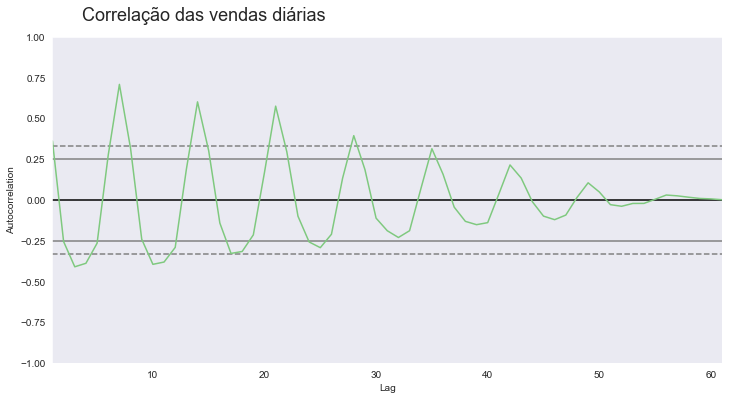

In [234]:
#Correlação das vendas diárias

ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das vendas diárias", fontsize= 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia["vendas"])
ax = ax 

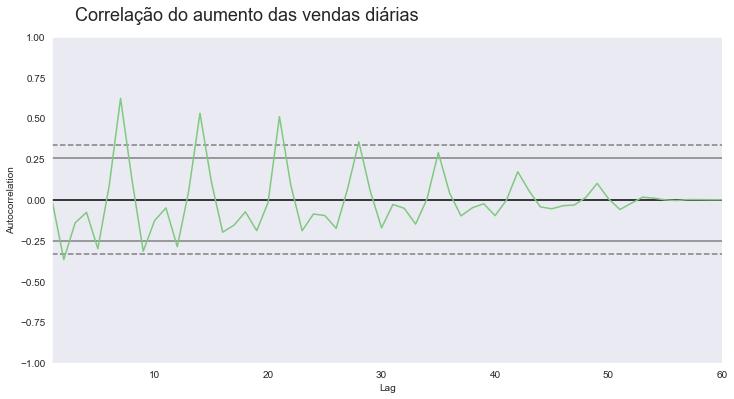

In [235]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação do aumento das vendas diárias", fontsize= 18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia["aumento"][1:])
ax = ax 

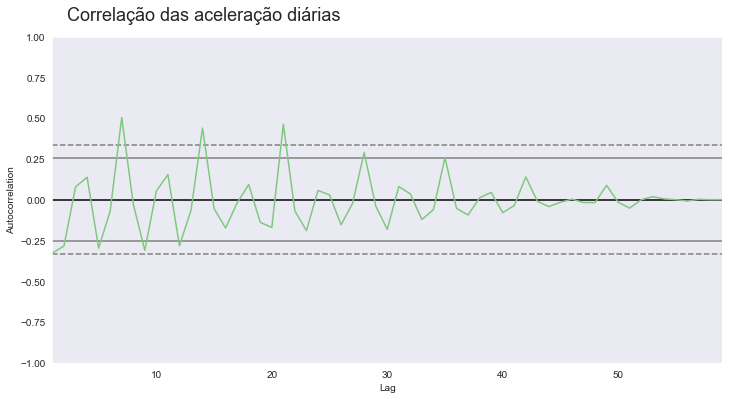

In [236]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das aceleração diárias", fontsize= 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia["aceleracao"][2:])
ax = ax 

Análise de vendas CAFÉLURA

In [237]:
cafelura = pd.read_csv("Dados/cafelura.csv")

In [238]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [239]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [240]:
cafelura["mes"] = pd.to_datetime(cafelura["mes"])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [241]:
print(f"Quantidade de linhas e colunas: {cafelura.shape}")
print(f"Quantidade de dados NULOS: {cafelura.isna().sum().sum()}")

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados NULOS: 0


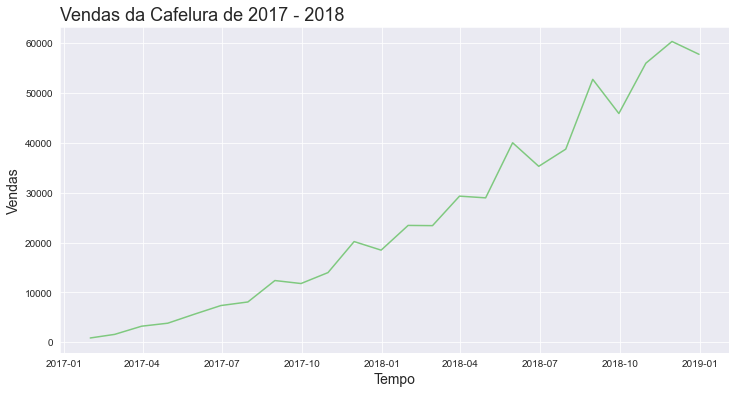

In [242]:
plotar("Vendas da Cafelura de 2017 - 2018", "Tempo", "Vendas", "mes", "vendas", cafelura)

In [243]:
#Fazendo a normalização com finais de semana
quantidade_de_dias_de_fds = pd.read_csv("Dados/dias_final_de_semana.csv")
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [244]:
quantidade_de_dias_de_fds["quantidade_de_dias"].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [245]:
cafelura["vendas_normalizadas"] = cafelura["vendas"] / quantidade_de_dias_de_fds["quantidade_de_dias"].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


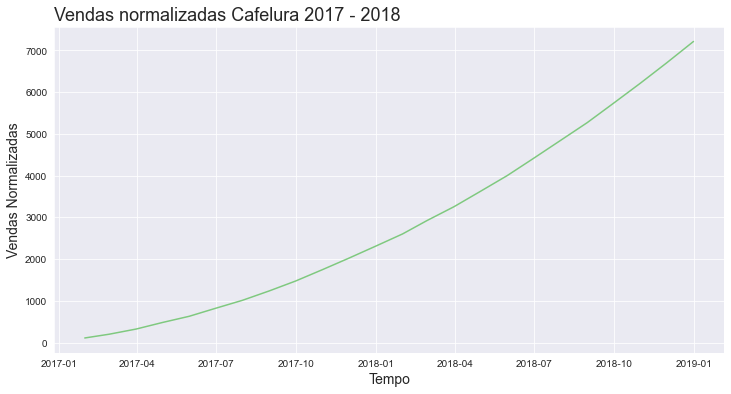

In [246]:
plotar("Vendas normalizadas Cafelura 2017 - 2018", "Tempo", "Vendas Normalizadas", "mes", "vendas_normalizadas", cafelura)

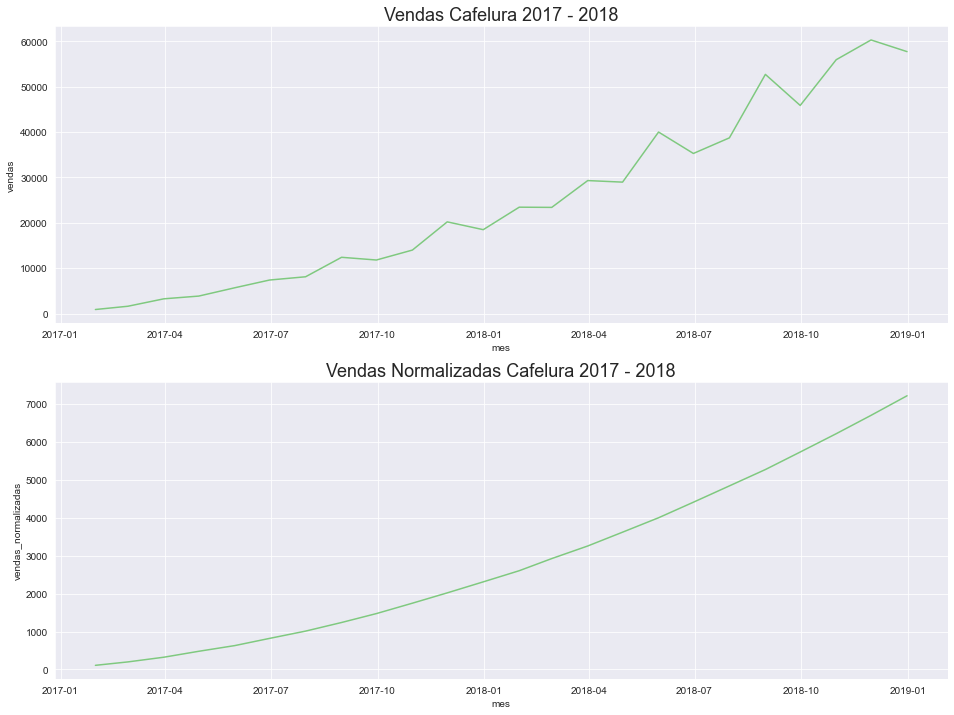

In [247]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(2, 1, 1)
ax.set_title("Vendas Cafelura 2017 - 2018", fontsize=18)
sns.lineplot(x="mes", y="vendas", data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title("Vendas Normalizadas Cafelura 2017 - 2018", fontsize= 18)
sns.lineplot(x="mes", y="vendas_normalizadas", data=cafelura)
ax = ax 

Utilizando o Statsmodels

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Gustavo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


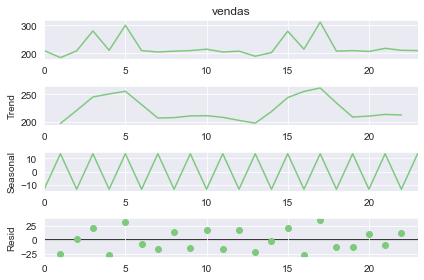

In [249]:
resultado = seasonal_decompose(chocolura["vendas"], freq=2)
ax = resultado.plot()

In [250]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [251]:
data = ({
    "observacao": observacao,
    "tendencia": tendencia,
    "sazonalidade": sazonalidade,
    "ruido": ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


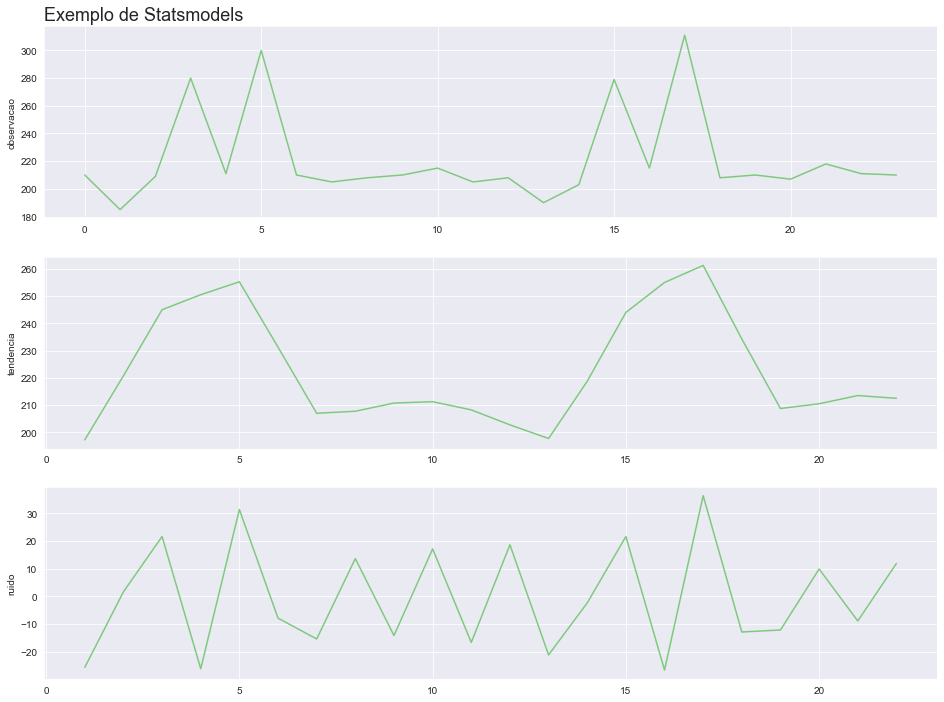

In [252]:
plot_comparacao(resultado.index, "observacao", "tendencia", "ruido", resultado, "Exemplo de Statsmodels")

    Análise de dados - Alucel

In [253]:
alucel = pd.read_csv("Dados/alucel.csv")

In [254]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [255]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [256]:
alucel["dia"] = pd.to_datetime(alucel["dia"])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [257]:
print(f"Quantidade de linhas e colunas: {alucel.shape}")
print(f"Quantidade de dados NULOS: {alucel.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados NULOS: 0


In [258]:
alucel["aumento"] = alucel["vendas"].diff()
alucel["aceleracao"] = alucel["aumento"].diff()

In [259]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


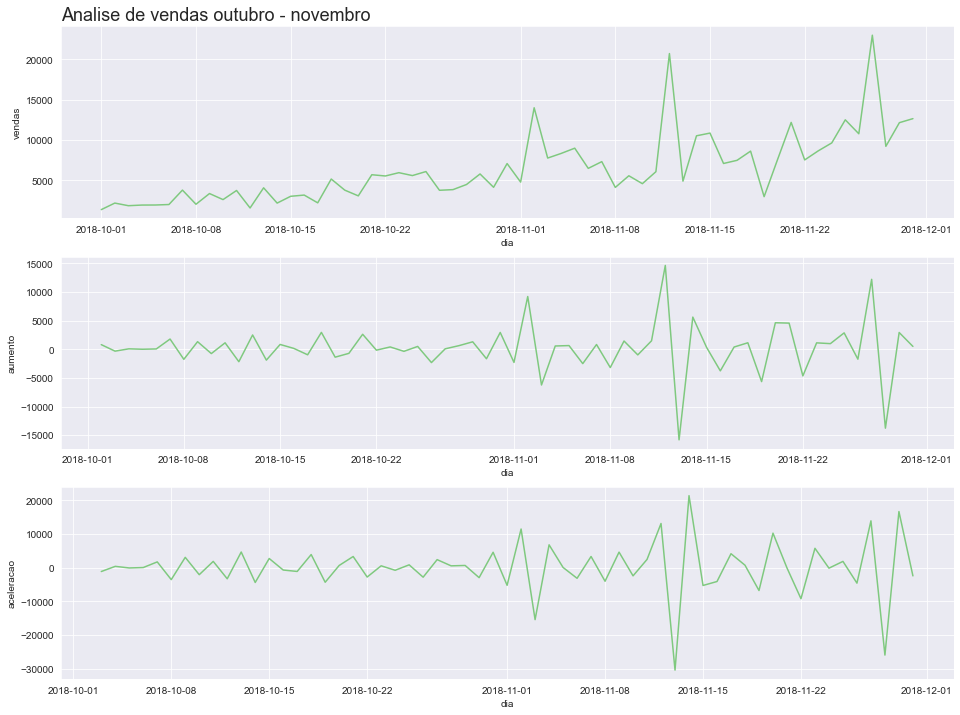

In [260]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analise de vendas outubro - novembro') 

In [261]:
#Aplicando a MEDIA MOVEL para minimizar os ruídos em uma série temporal

In [262]:
alucel["media_movel"] = alucel["vendas"].rolling(7).mean() #função rolling já calcula a média móvel


In [263]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


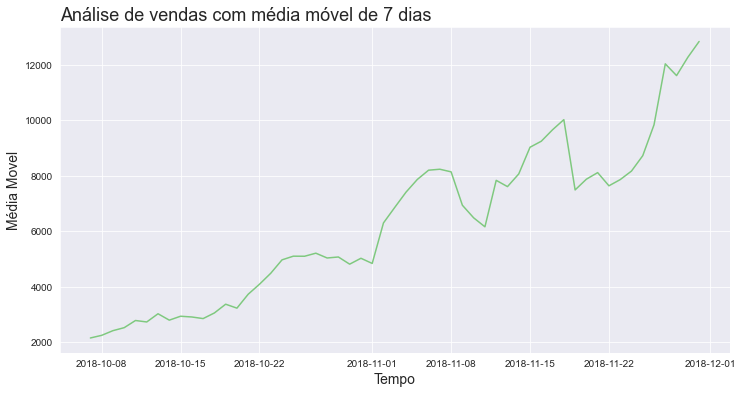

In [264]:
plotar("Análise de vendas com média móvel de 7 dias", "Tempo", "Média Movel", "dia", "media_movel", alucel)

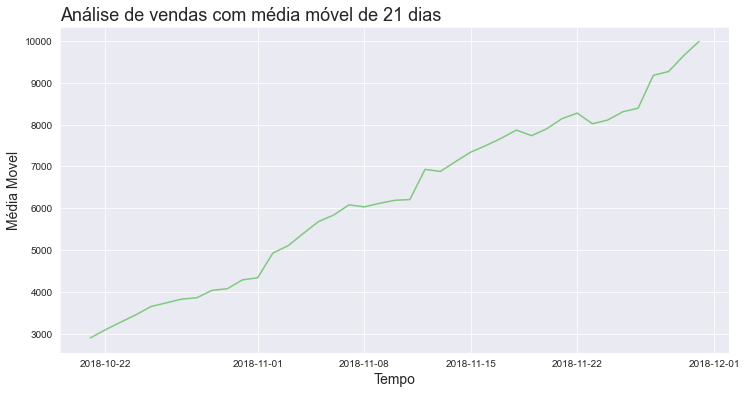

In [265]:
alucel["media_movel_21"] = alucel["vendas"].rolling(21).mean()
plotar("Análise de vendas com média móvel de 21 dias", "Tempo", "Média Movel", "dia", "media_movel_21", alucel)

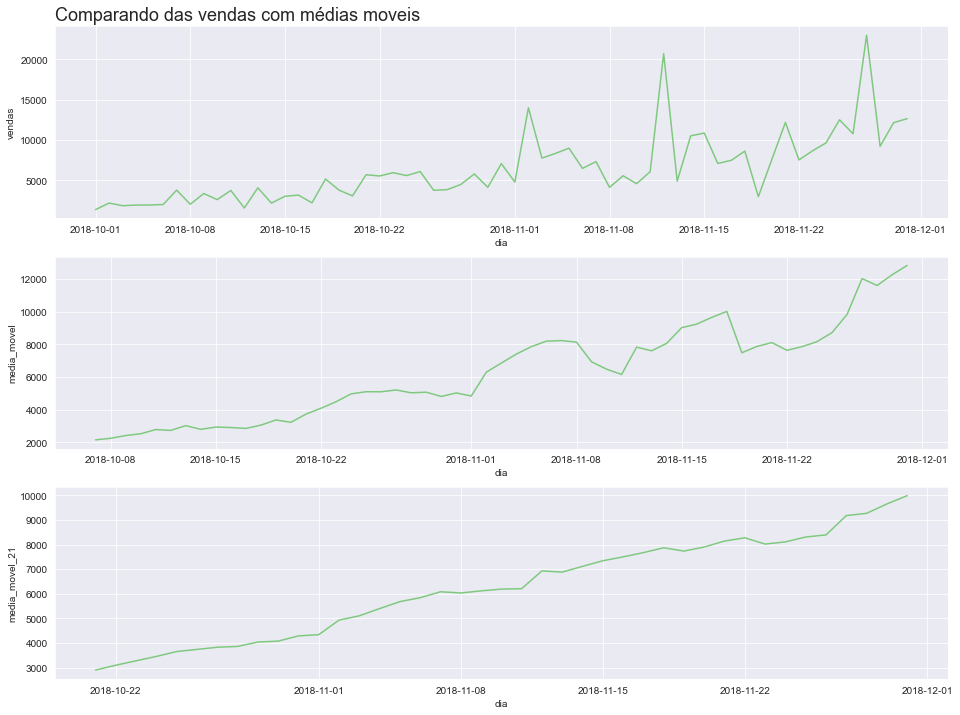

In [266]:
plot_comparacao("dia", "vendas", "media_movel", "media_movel_21", alucel, "Comparando das vendas com médias moveis")